In [12]:
import pandas as pd
import openpyxl as op
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [13]:
base=pd.read_excel('/Users/dagobertoborre/Documents/Diplomado/Base_COD.xlsx')

In [14]:
import sweetviz as sv

In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1282 non-null   object 
 1   wins                 1282 non-null   int64  
 2   kills                1282 non-null   int64  
 3   kdRatio              1282 non-null   float64
 4   killstreak           1282 non-null   int64  
 5   level                1282 non-null   int64  
 6   losses               1282 non-null   int64  
 7   prestige             1282 non-null   int64  
 8   hits                 1282 non-null   int64  
 9   timePlayed           1282 non-null   int64  
 10  headshots            1282 non-null   int64  
 11  gamesPlayed          1282 non-null   int64  
 12  assists              1282 non-null   int64  
 13  misses               1282 non-null   int64  
 14  xp                   1282 non-null   int64  
 15  scorePerMinute       1282 non-null   f

In [16]:
base.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,kill/shot ratio,headshot/shot ratio
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.00000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1.282000e+03,1282.000000,1.282000e+03,1282.000000,953.000000,953.000000
mean,185.921217,4560.980499,0.774258,8.379875,53.76131,6.072543,56.692668,12554.159126,517.508580,766.449298,141.818253,833.431357,55121.117785,1.060483e+06,130.455858,6.767516e+04,4709.506240,0.334183,0.066564
std,323.606918,8528.773241,0.344874,10.659590,71.96835,7.289179,51.645801,24748.156401,838.963177,1402.242161,276.245584,1636.792735,105429.724045,1.928776e+06,116.106982,1.295096e+05,8585.815285,2.582978,0.559760
min,0.000000,1.000000,0.024390,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000e+00,0.000000,0.002278,0.000000
25%,1.000000,36.250000,0.522019,0.000000,5.00000,1.000000,0.000000,0.000000,18.000000,7.000000,0.000000,5.000000,0.000000,1.729625e+04,0.000000,0.000000e+00,70.000000,0.046796,0.007494
50%,34.000000,615.000000,0.834658,8.000000,22.00000,4.000000,45.000000,1104.000000,121.500000,106.000000,14.500000,111.000000,5545.000000,1.792825e+05,128.388053,6.482500e+03,724.000000,0.060602,0.010279
75%,244.000000,5226.000000,0.987955,13.000000,74.00000,9.000000,110.000000,13286.250000,688.000000,906.250000,165.000000,850.750000,62238.250000,1.167748e+06,237.771348,7.563675e+04,5466.500000,0.087477,0.014814
max,3519.000000,66935.000000,3.000000,235.000000,435.00000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000,53.888889,11.000000


/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                                                …

/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/sweetviz/

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



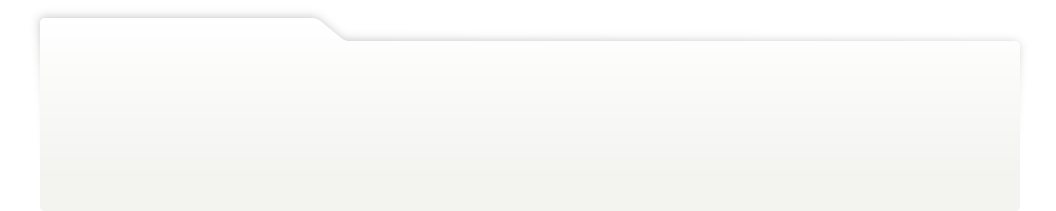
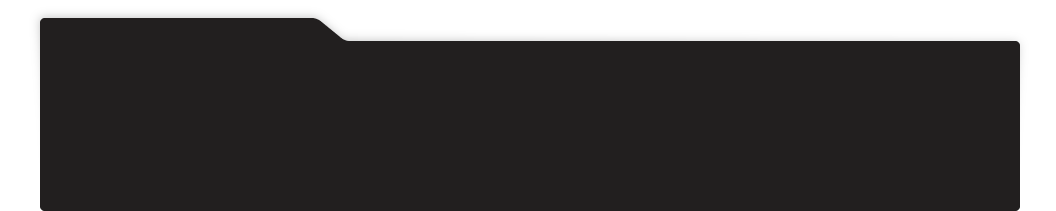
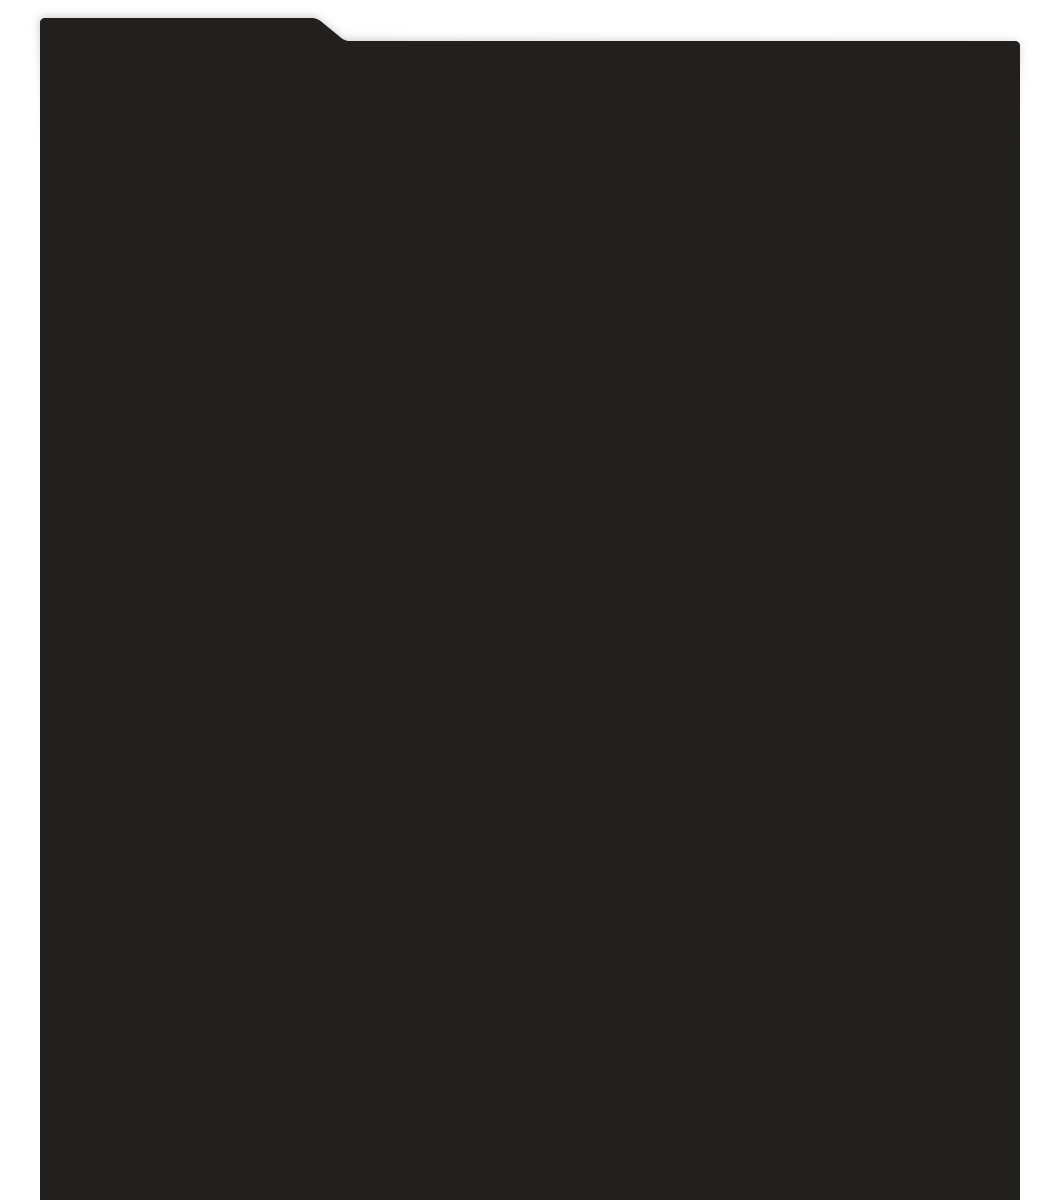
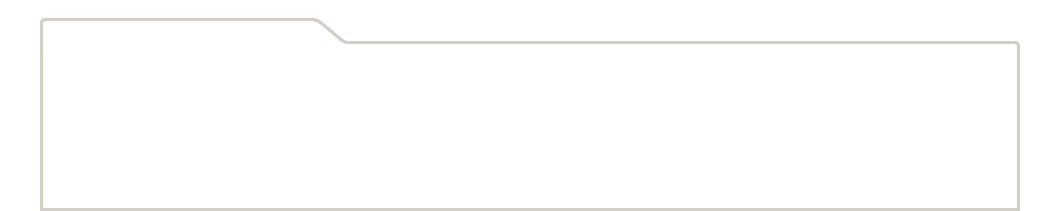
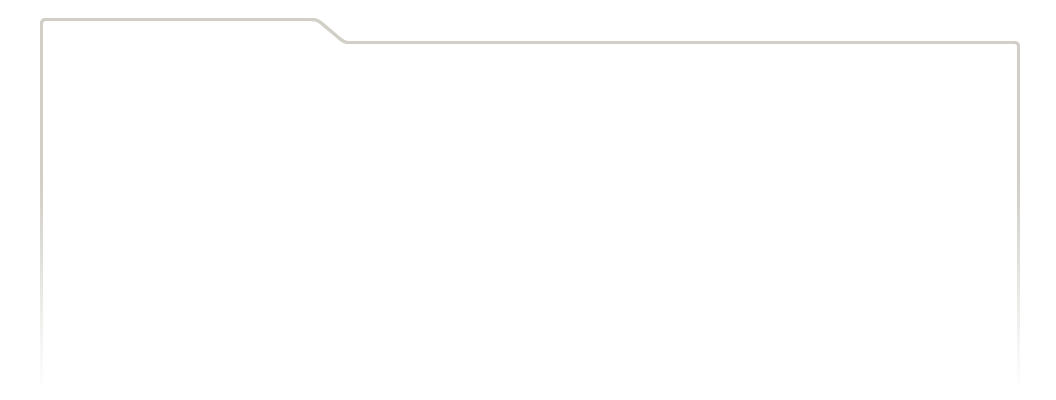
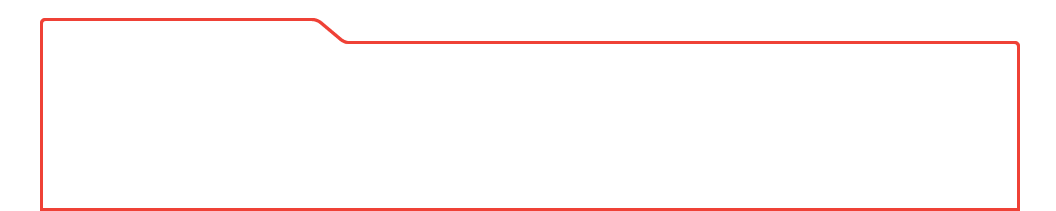
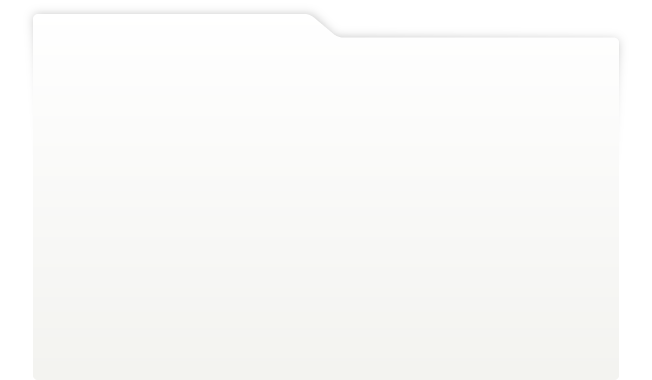
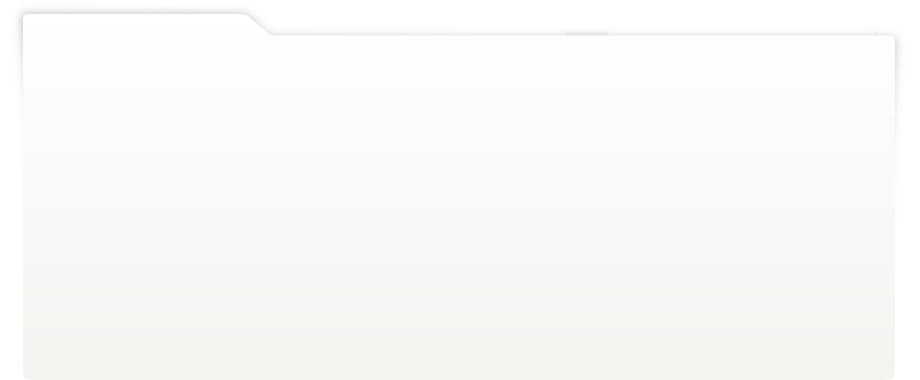
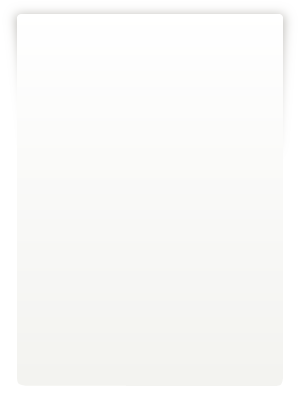
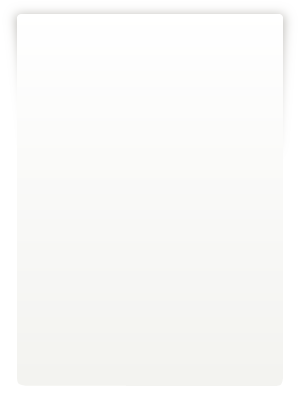
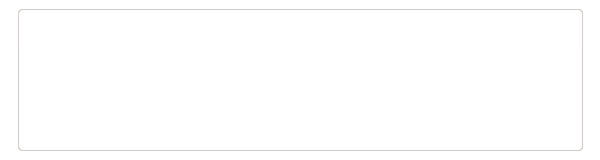
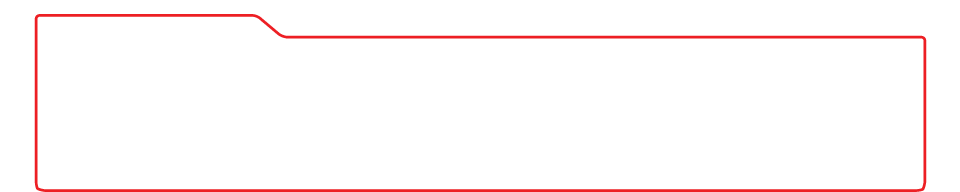
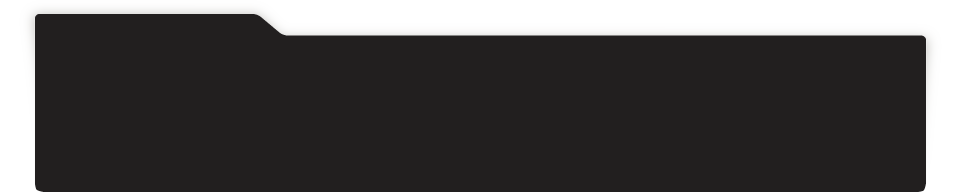
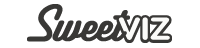
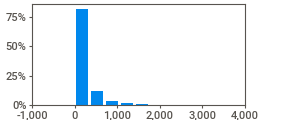
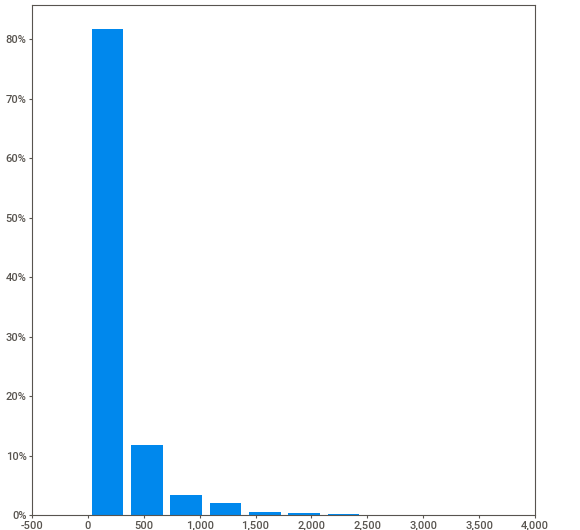
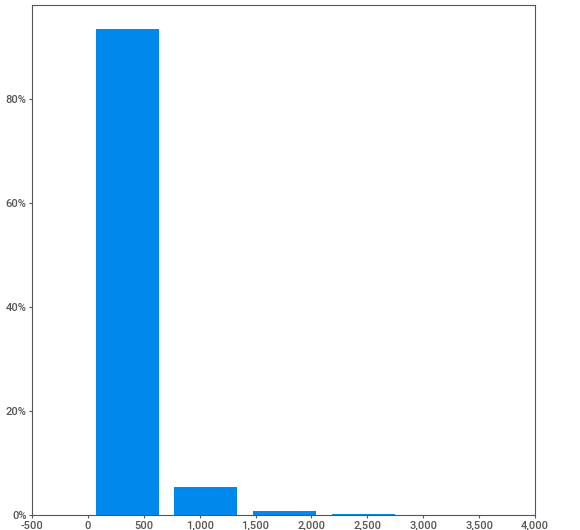
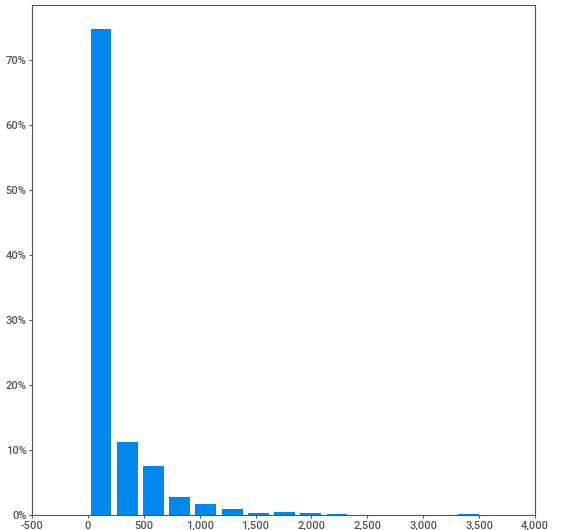
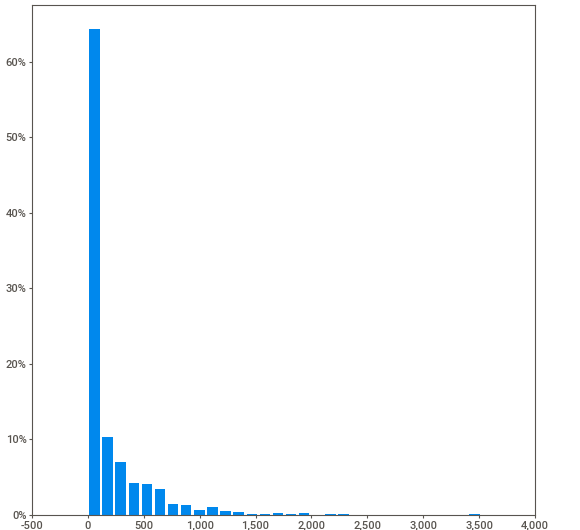
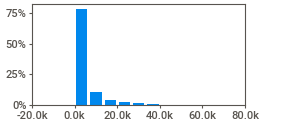
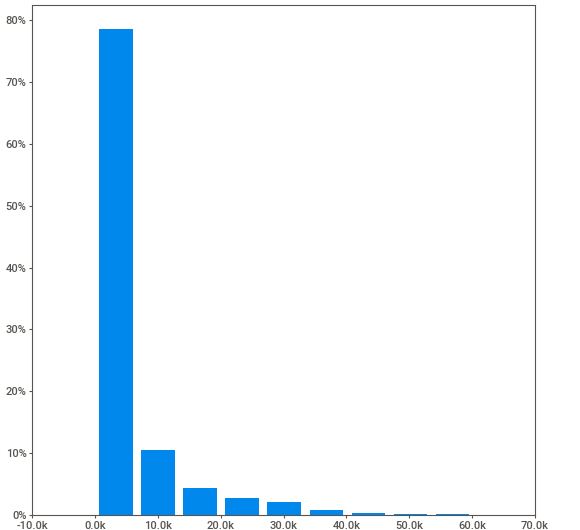
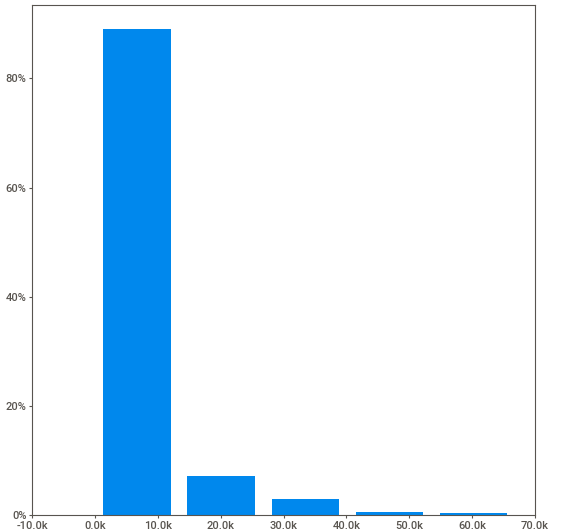
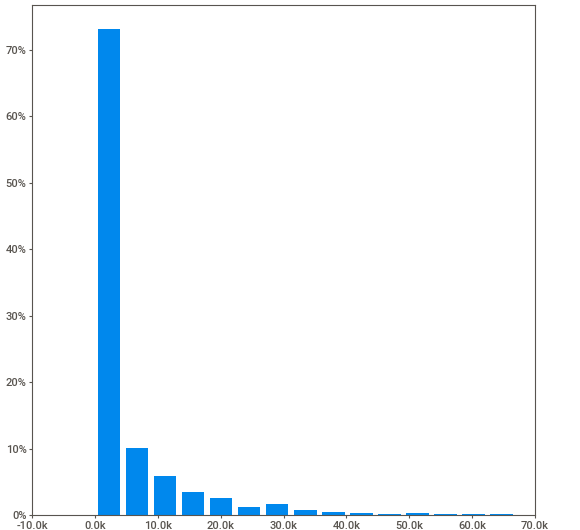
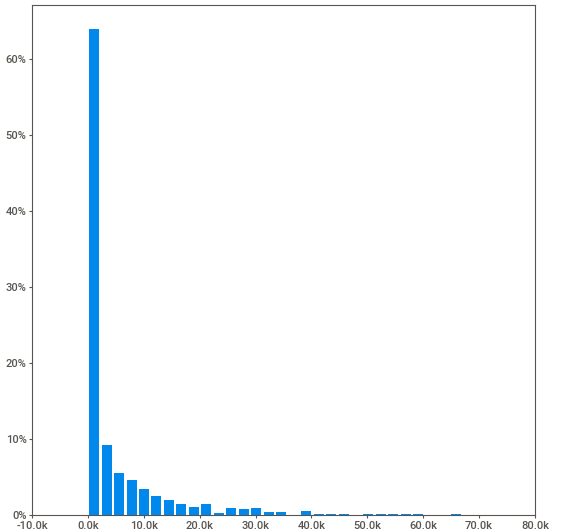
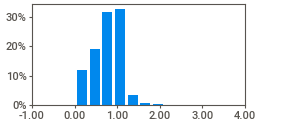
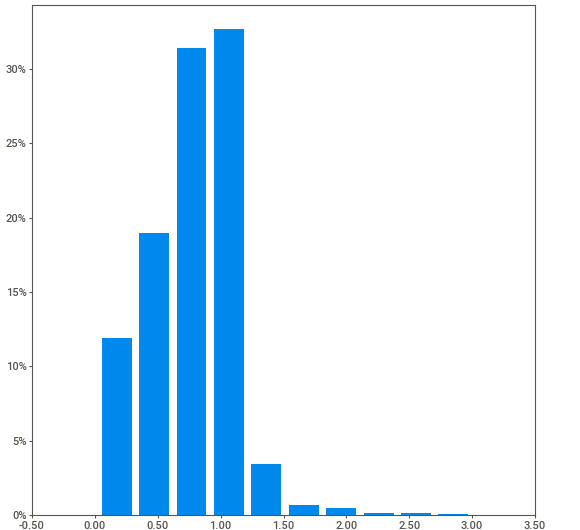
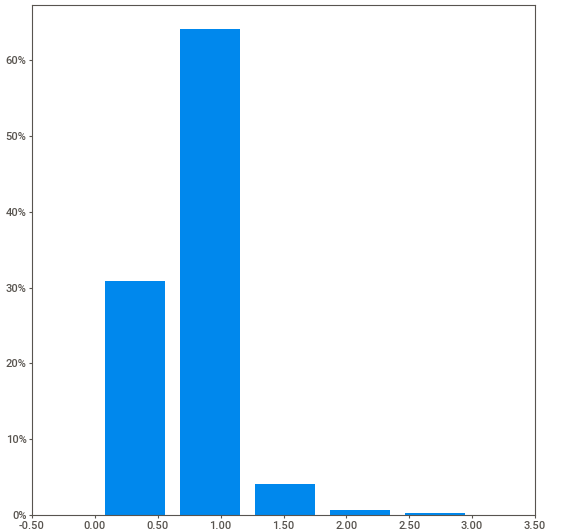
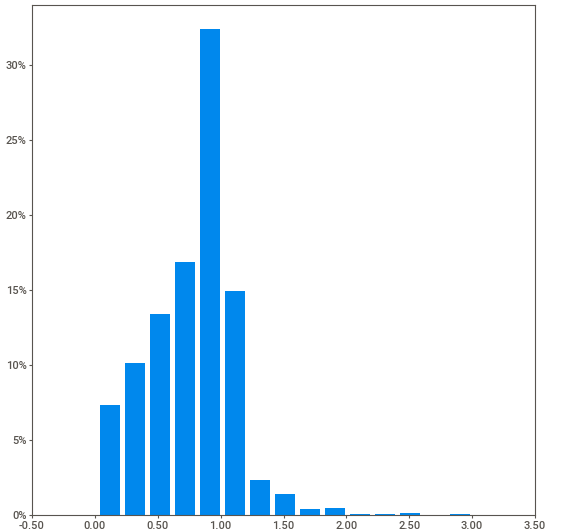
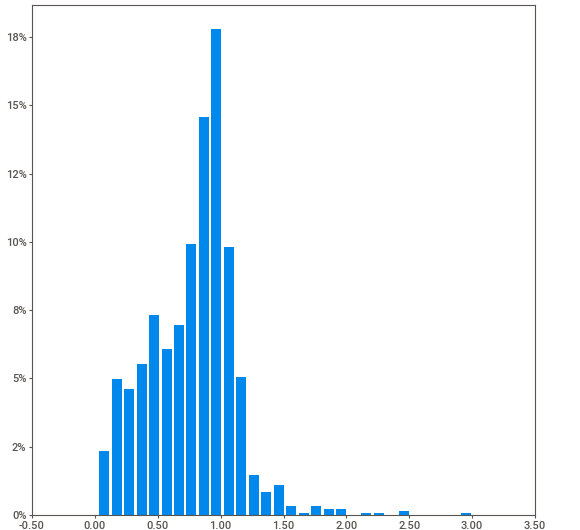
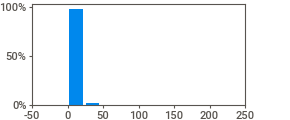
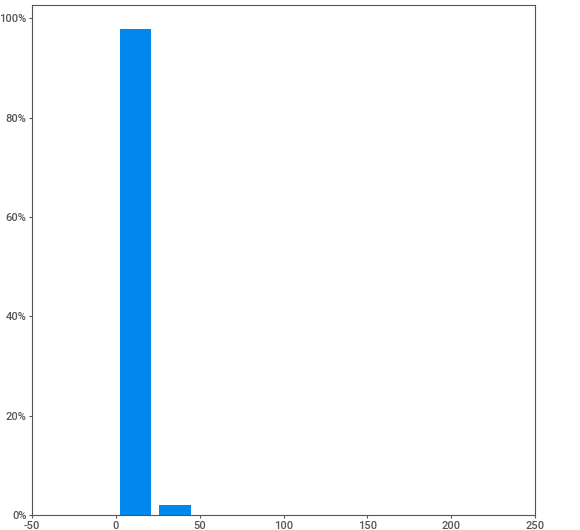
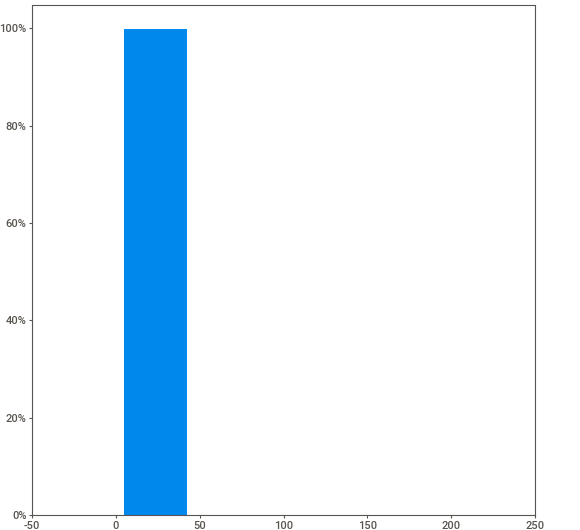
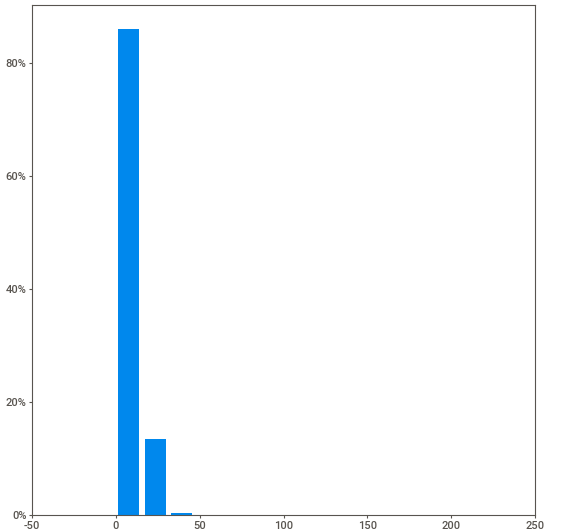
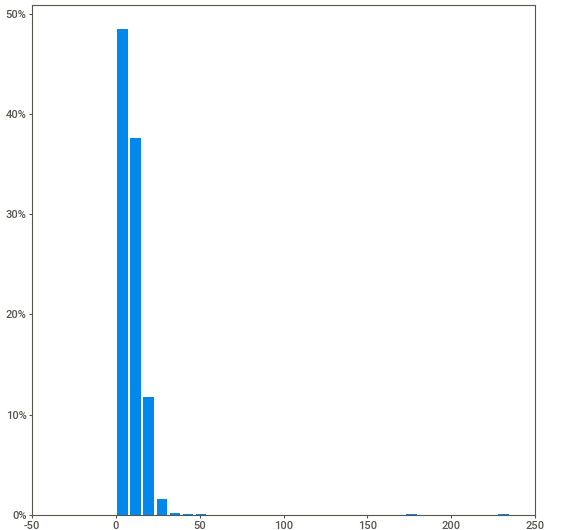
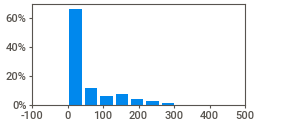
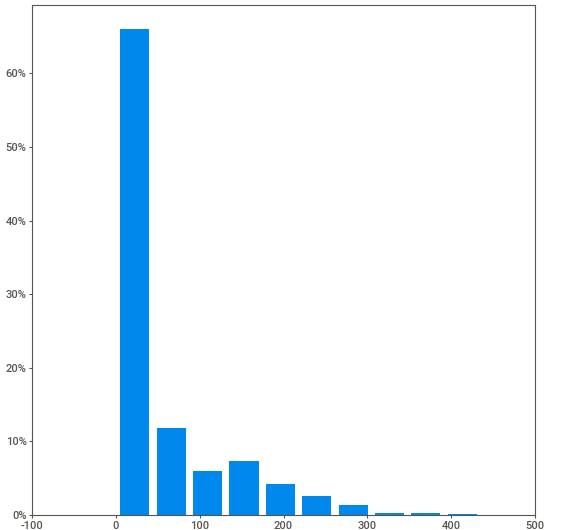
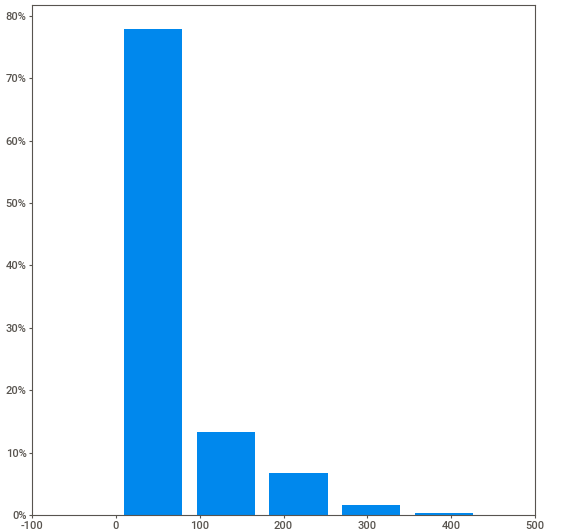
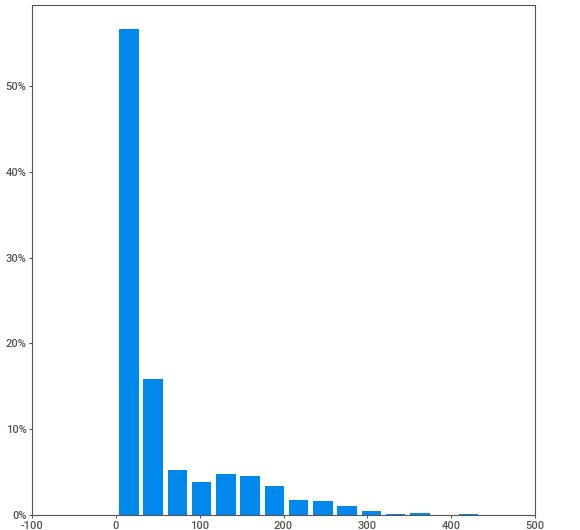
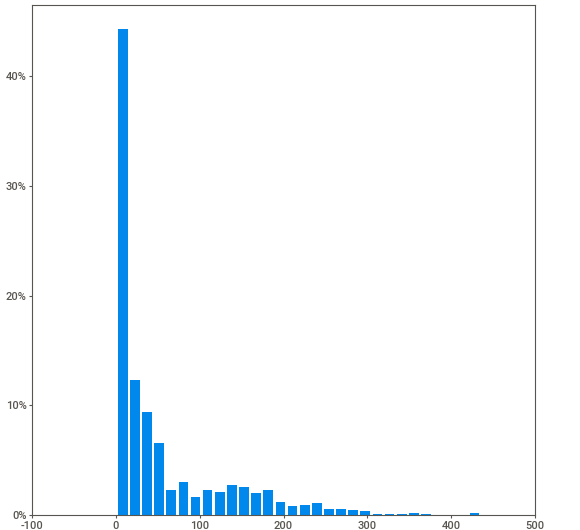
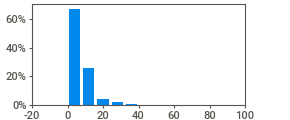
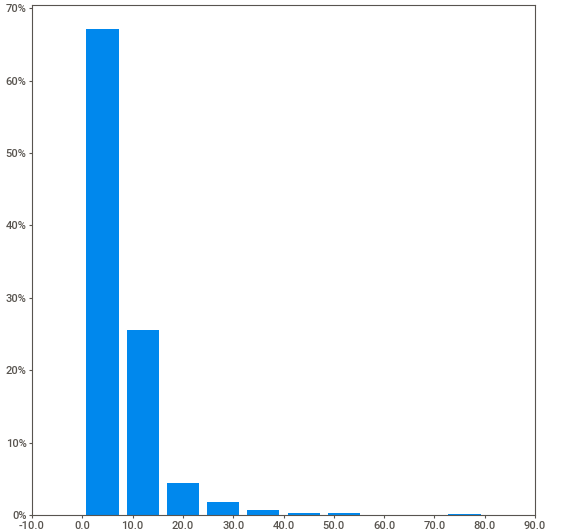
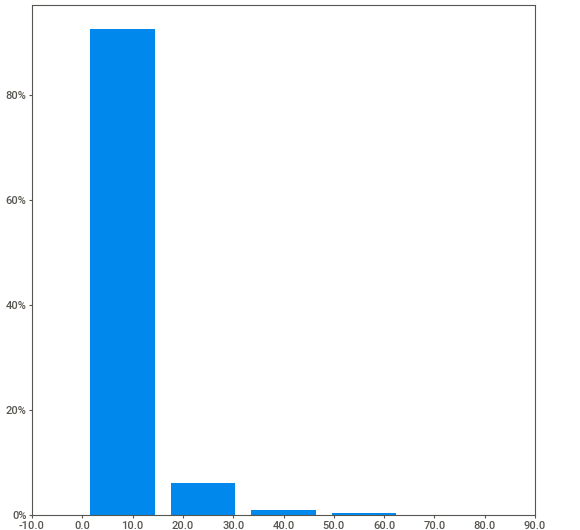
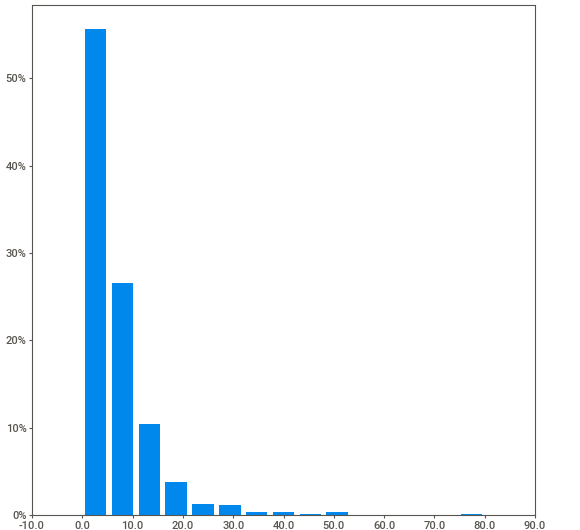
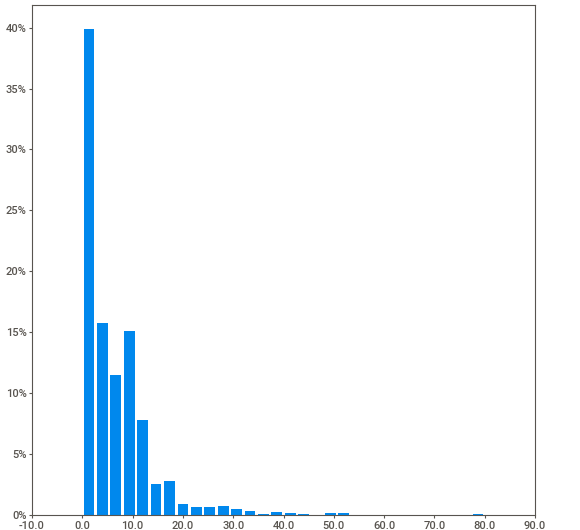
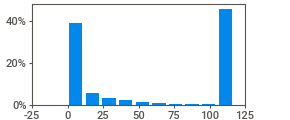
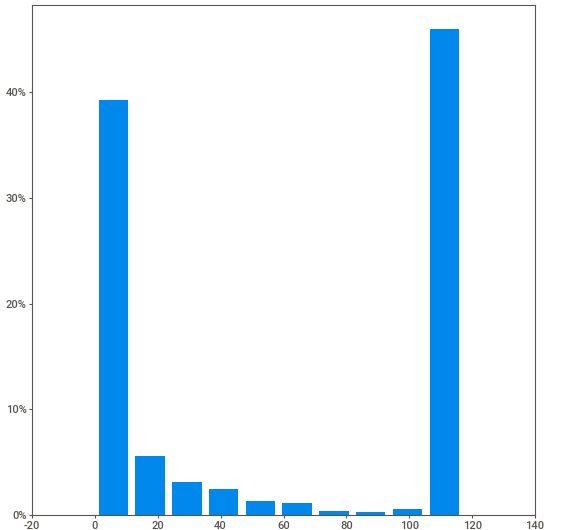
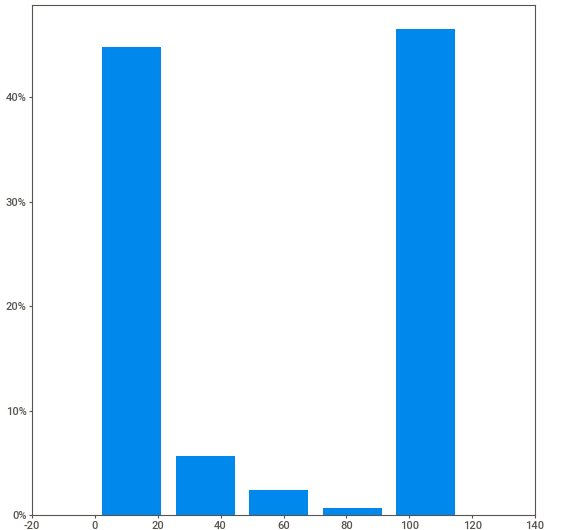
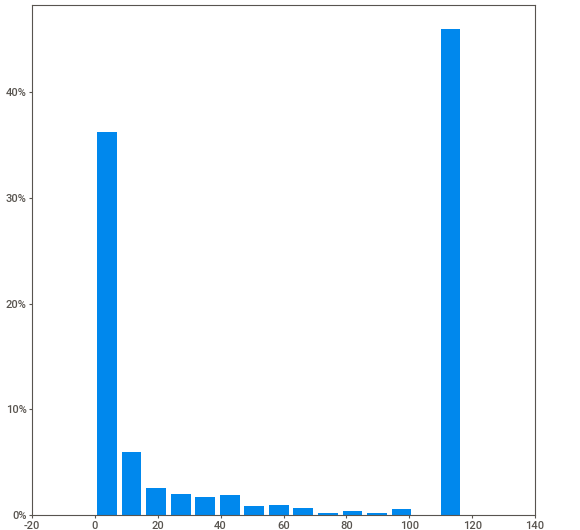
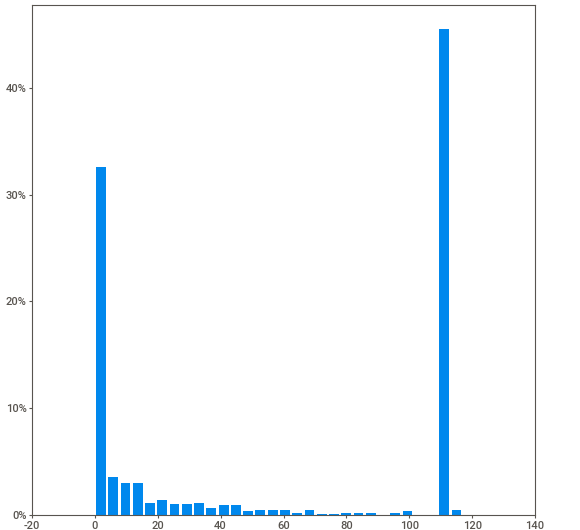
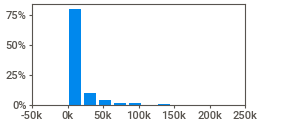
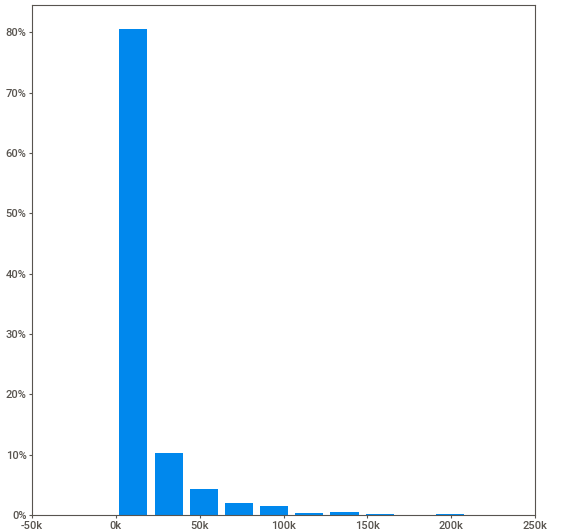
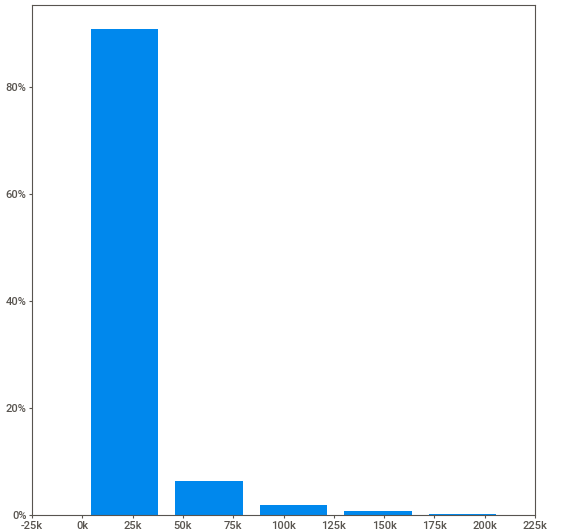
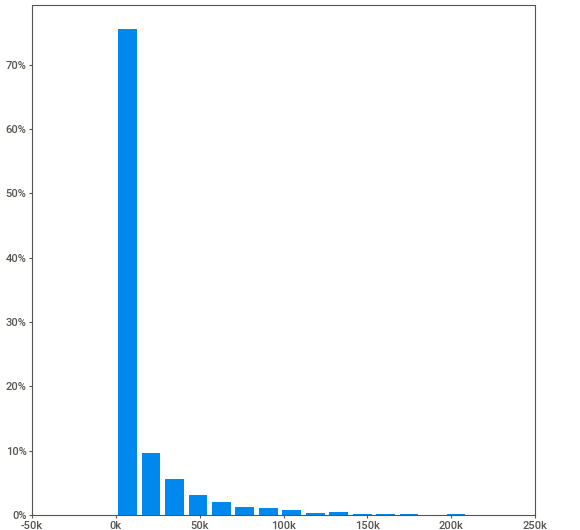
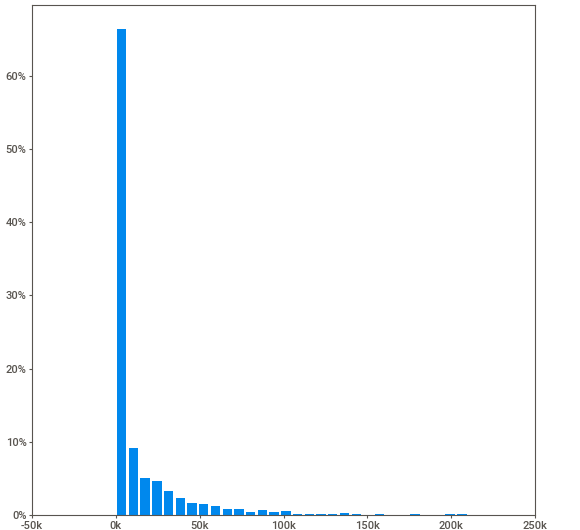
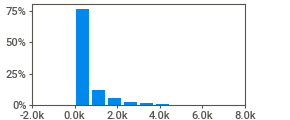
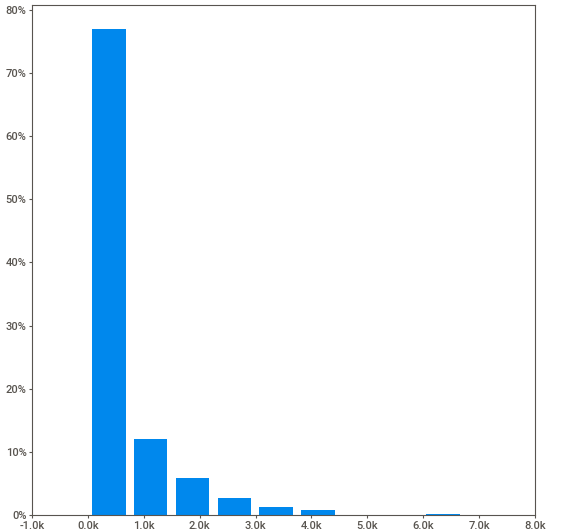
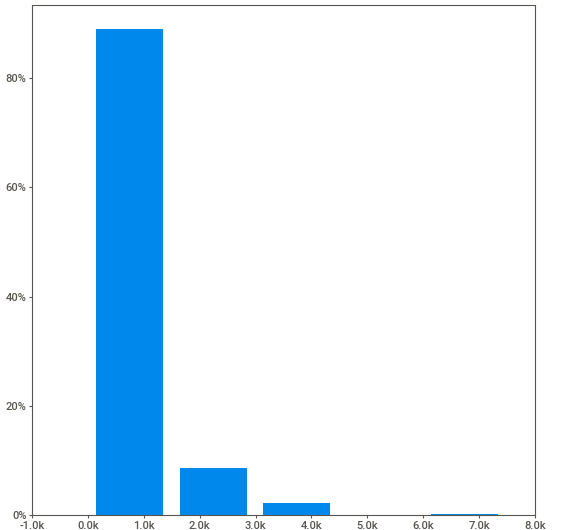
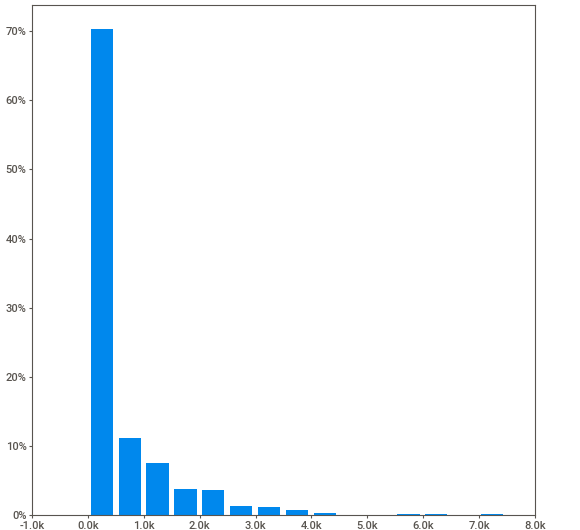
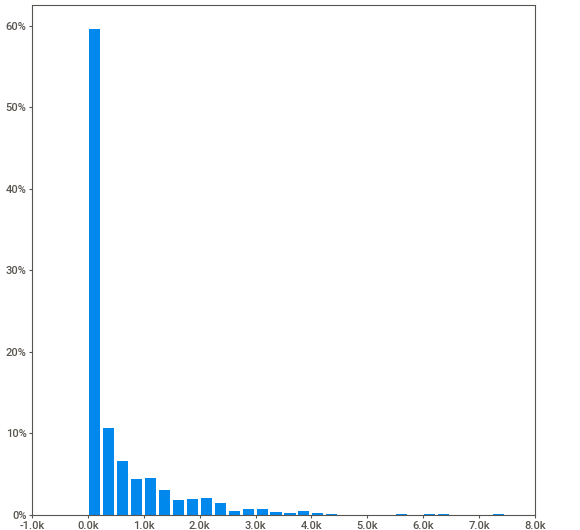
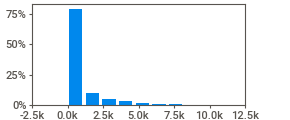
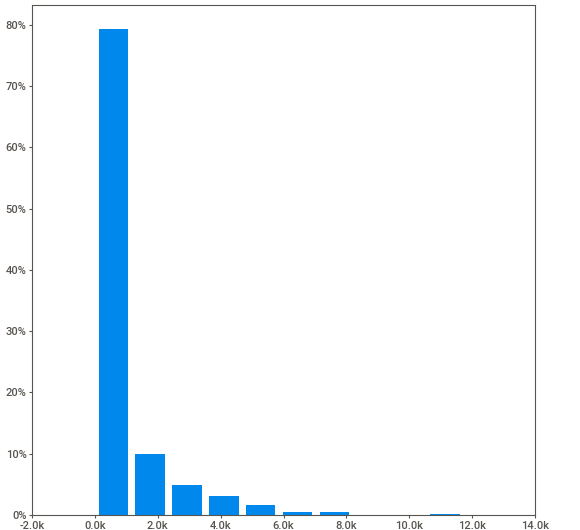
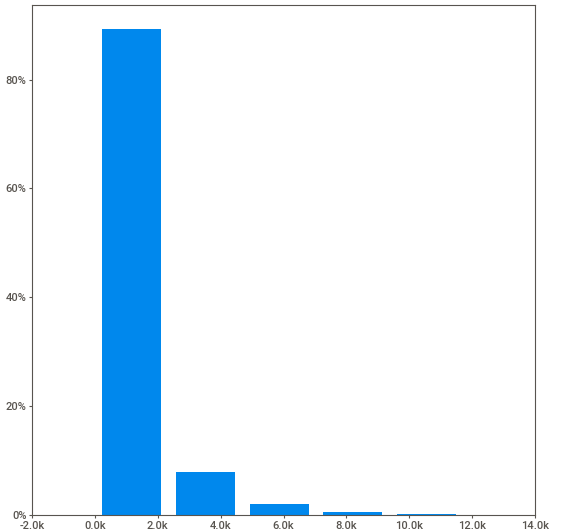
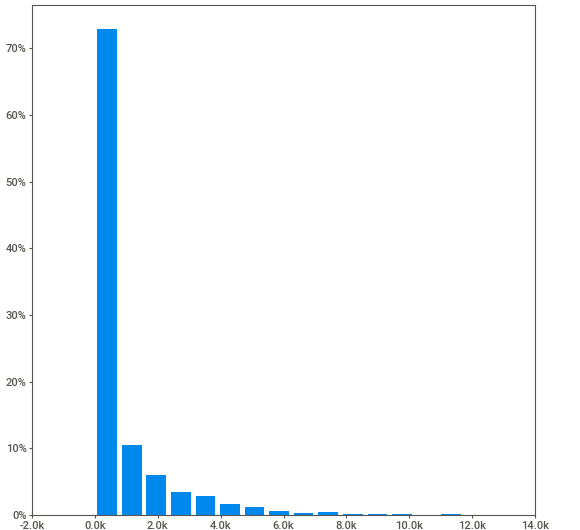
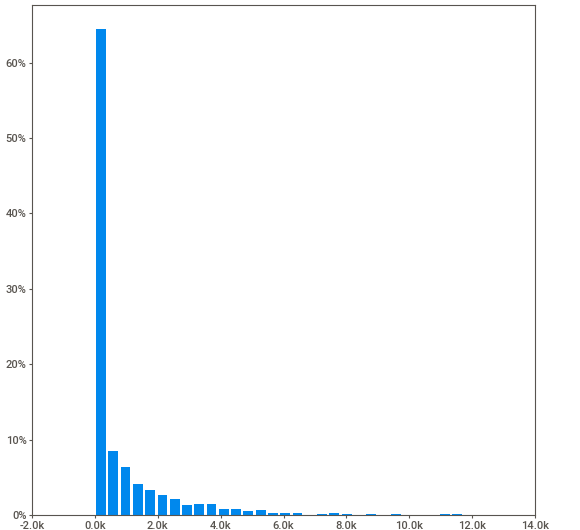
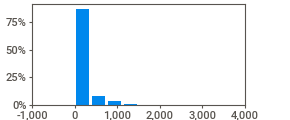
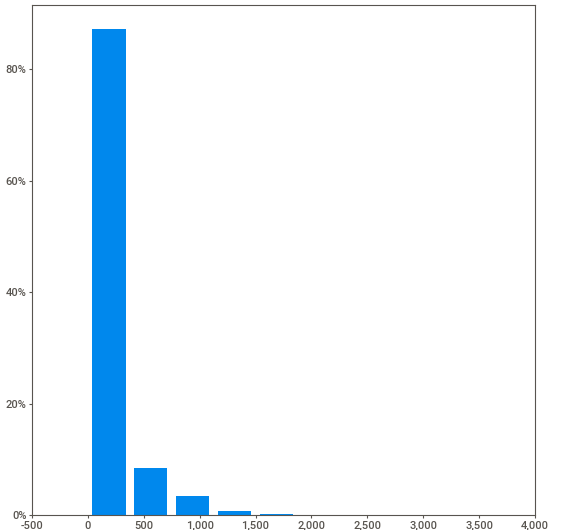
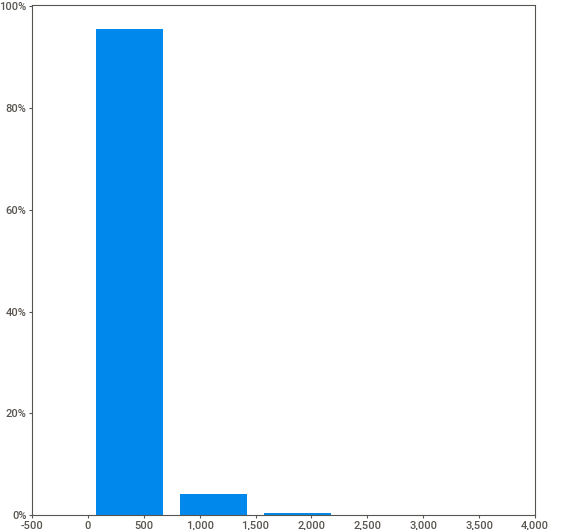
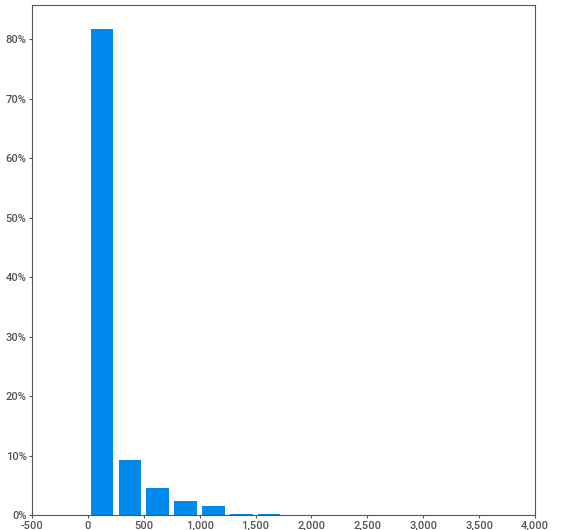
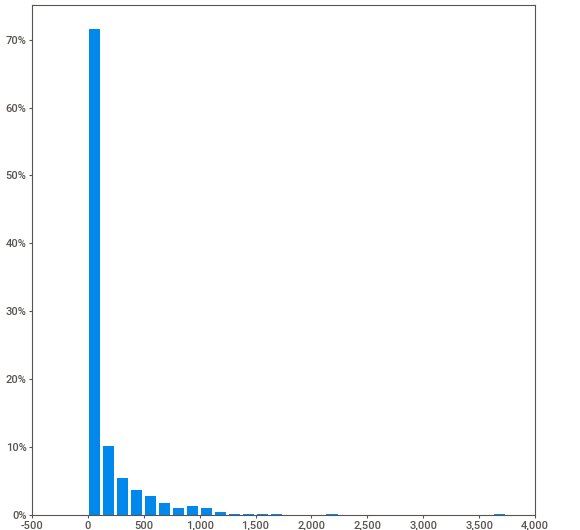
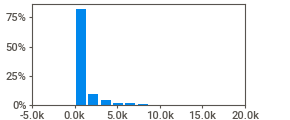
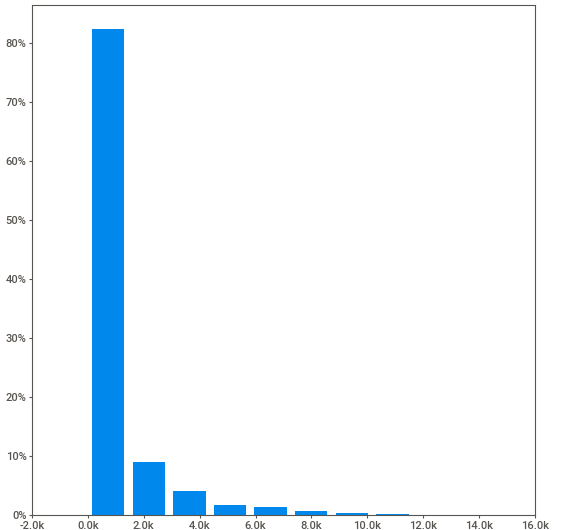
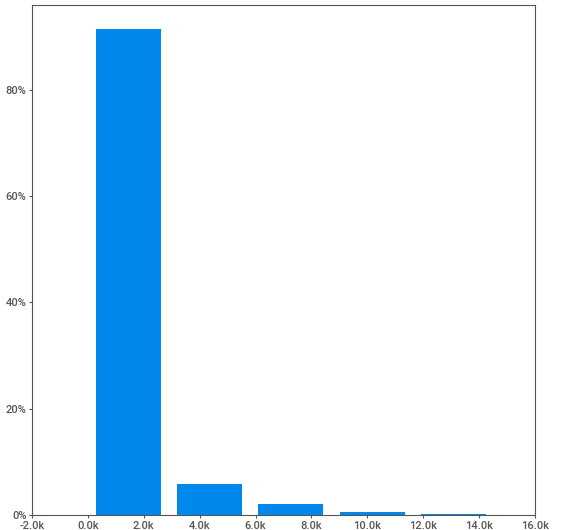
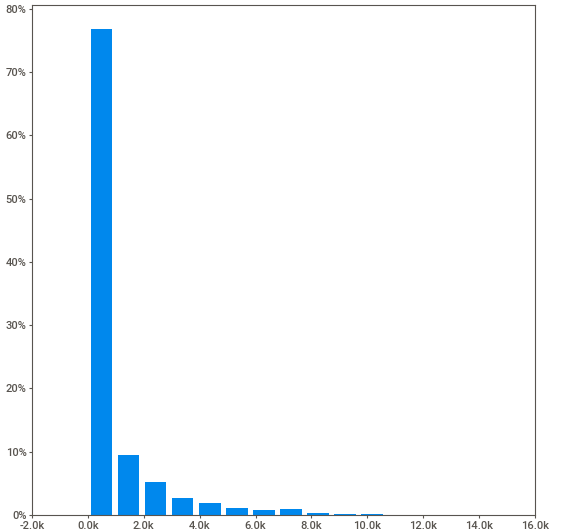
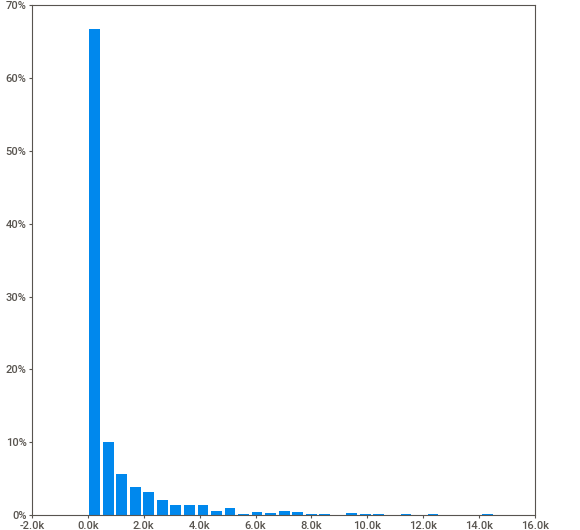
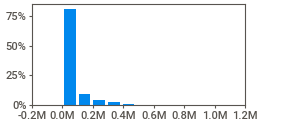
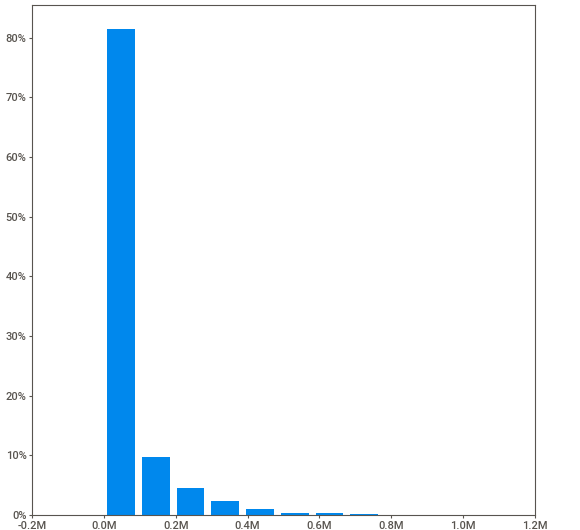
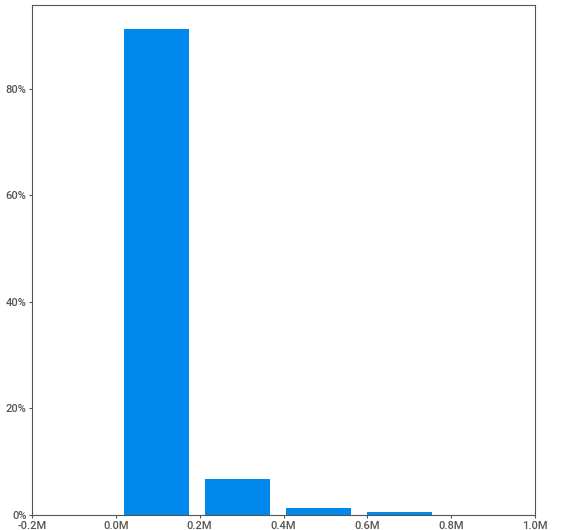
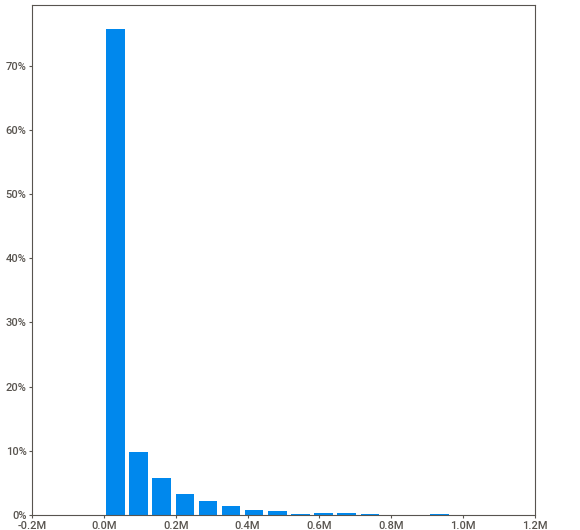
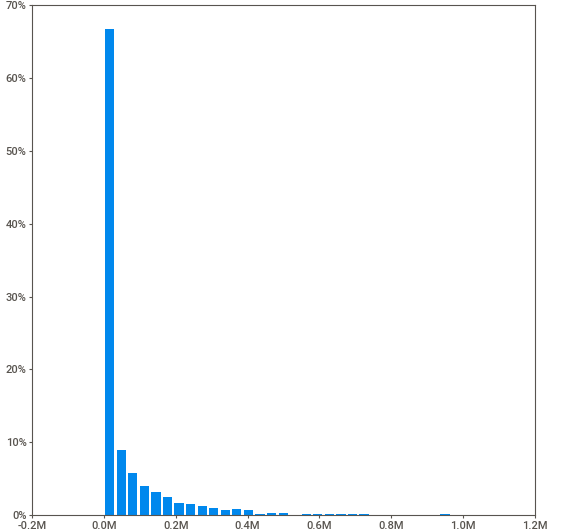
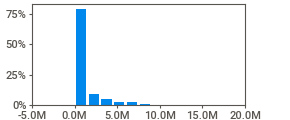
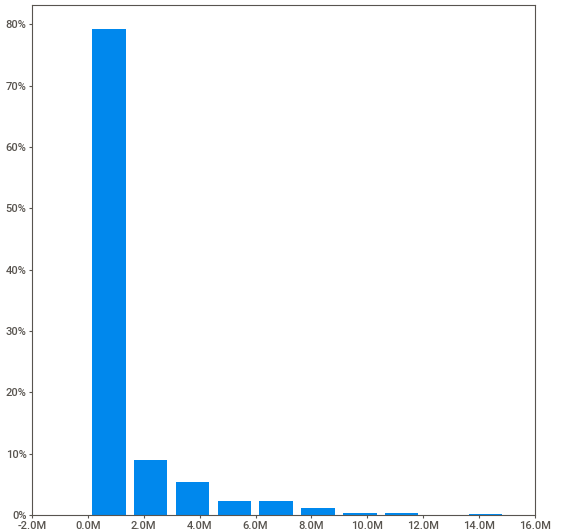
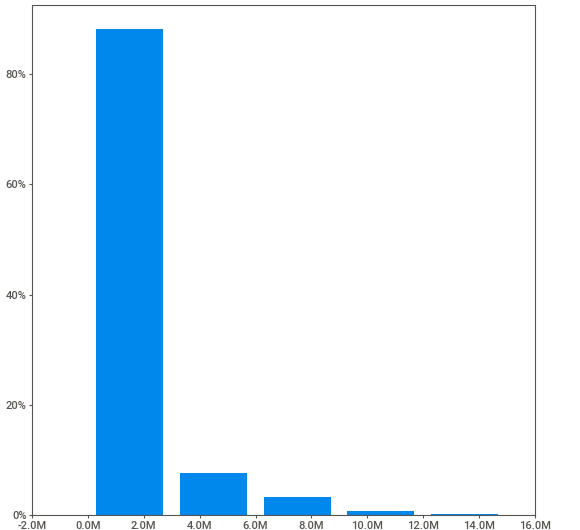
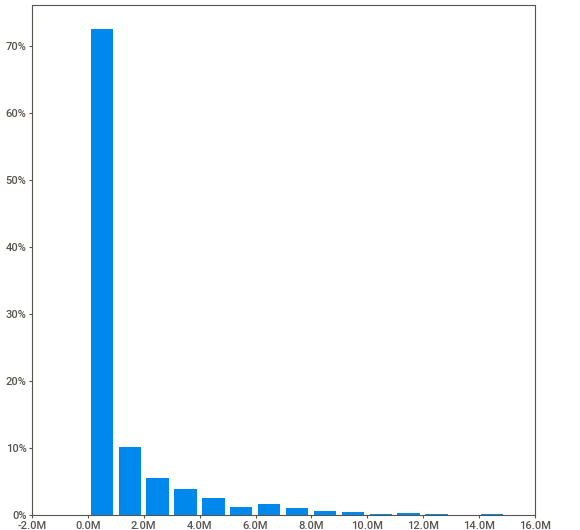
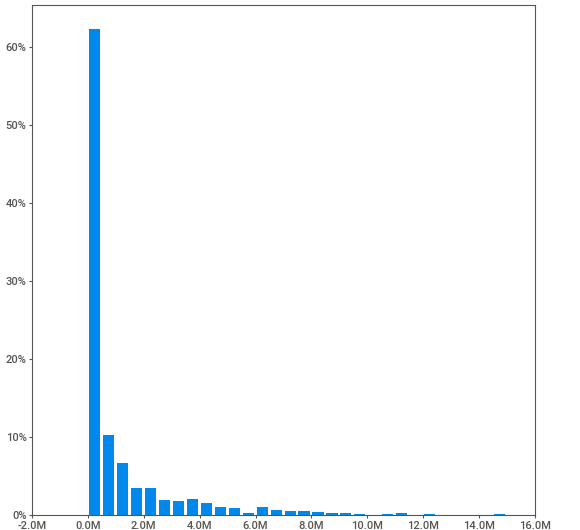
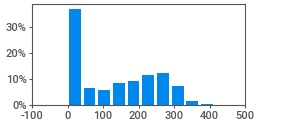
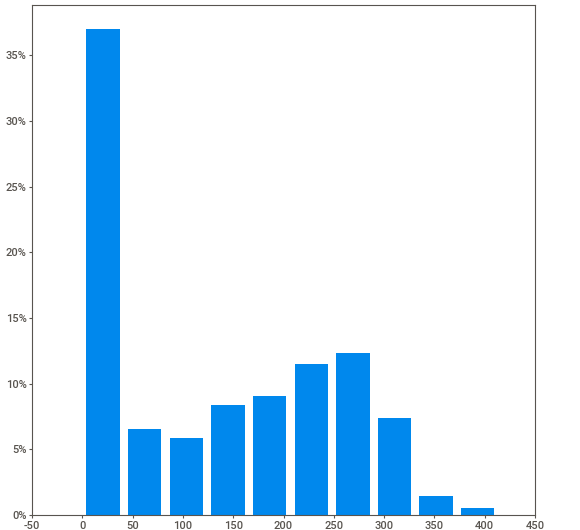
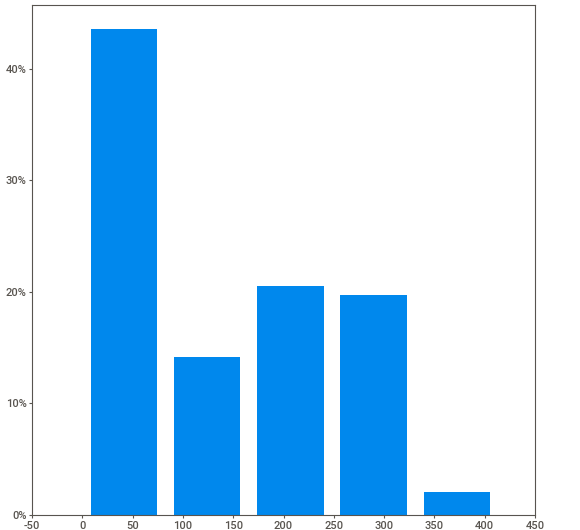
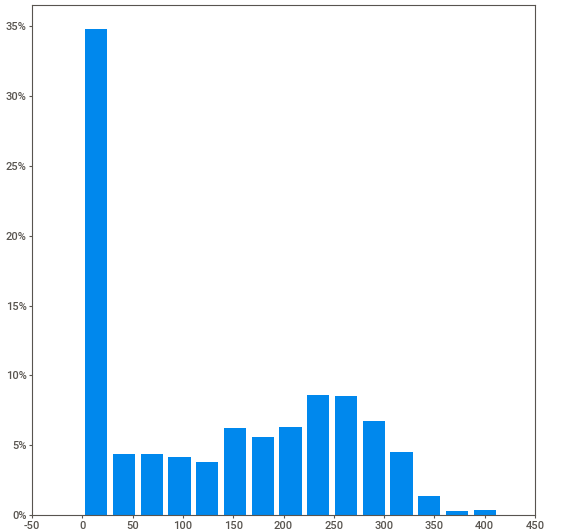
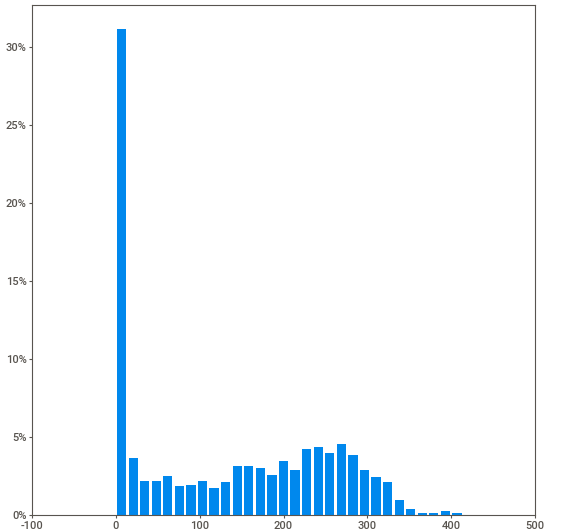
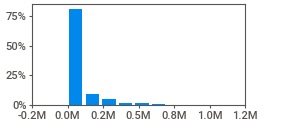
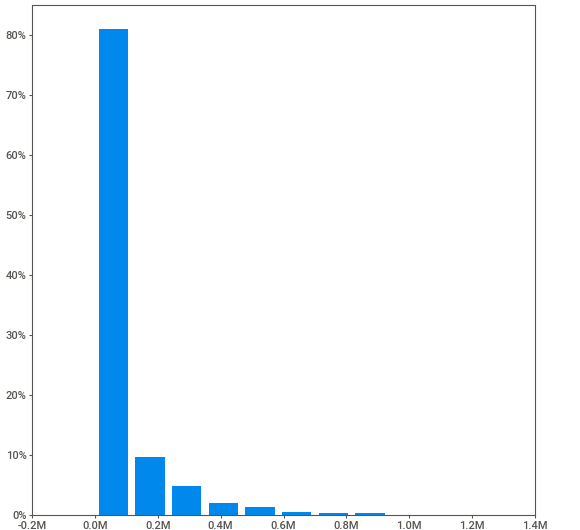
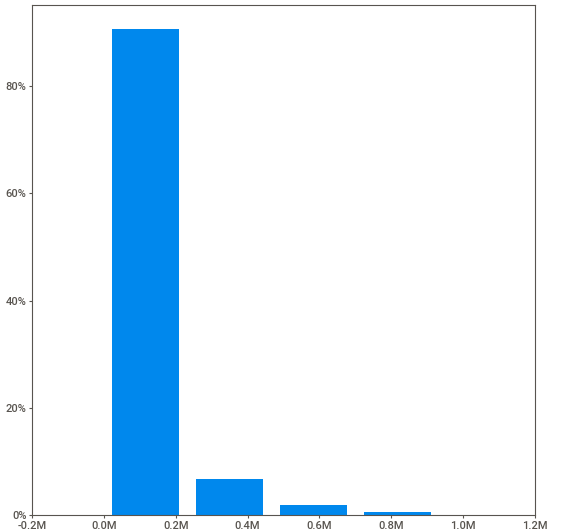
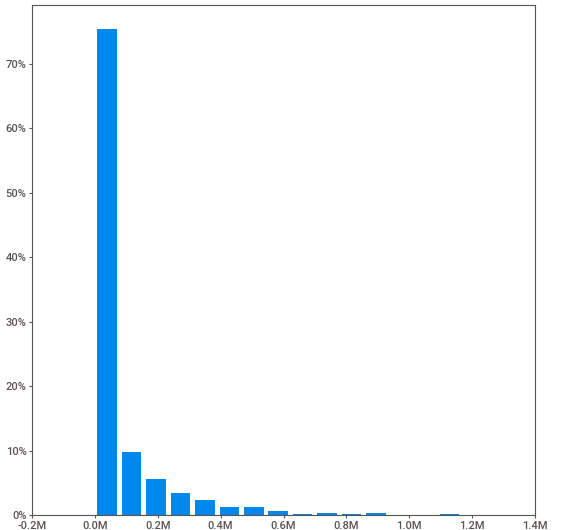
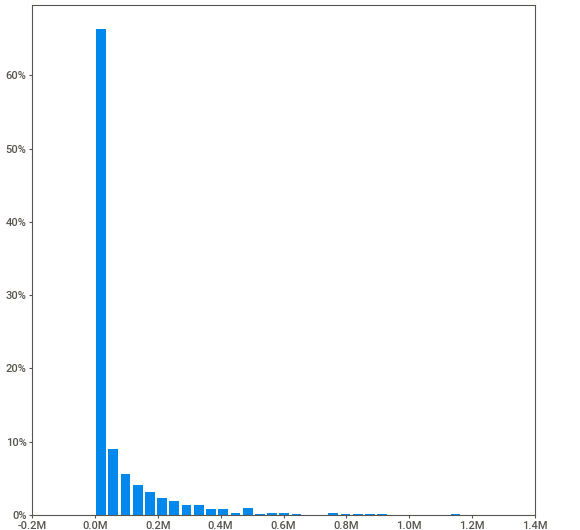
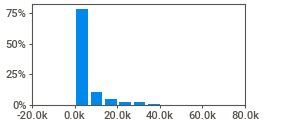
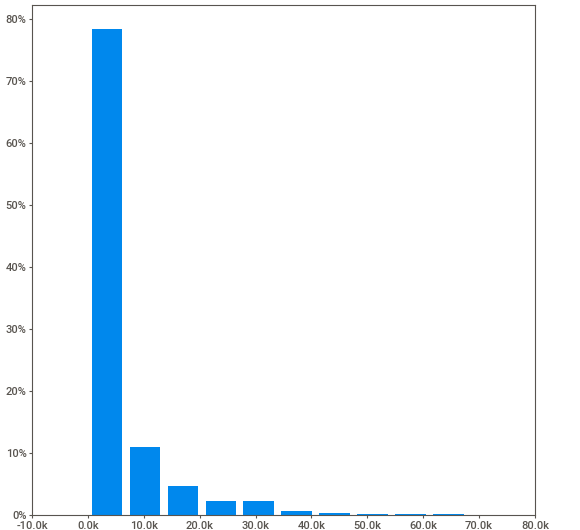
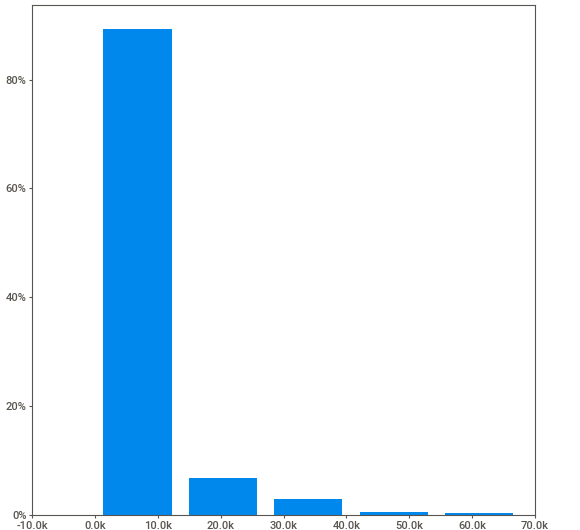
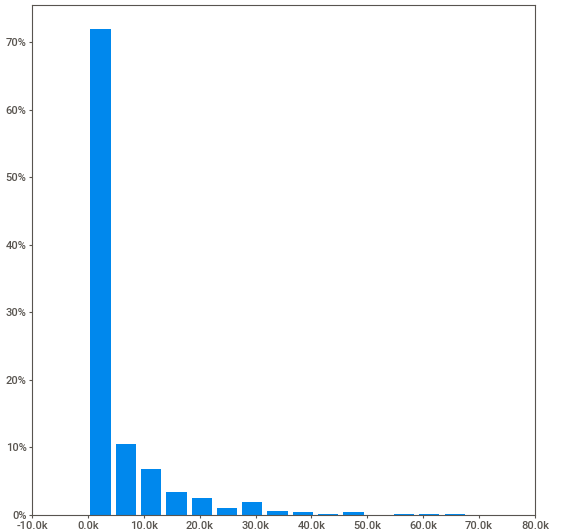
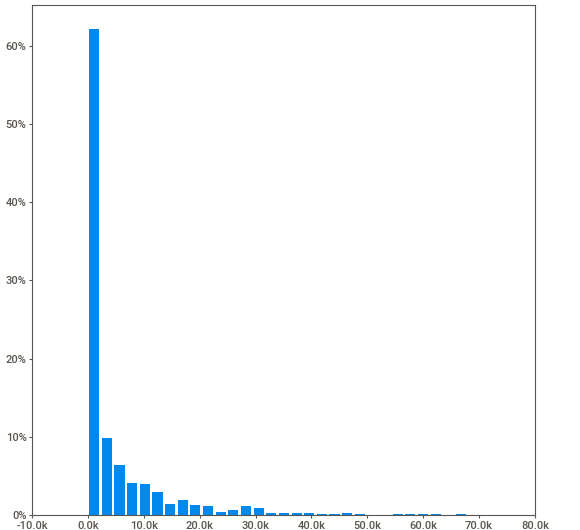
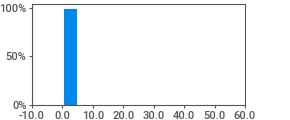
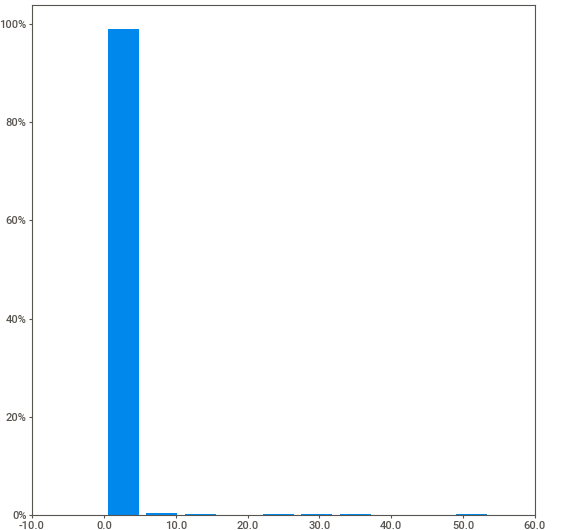
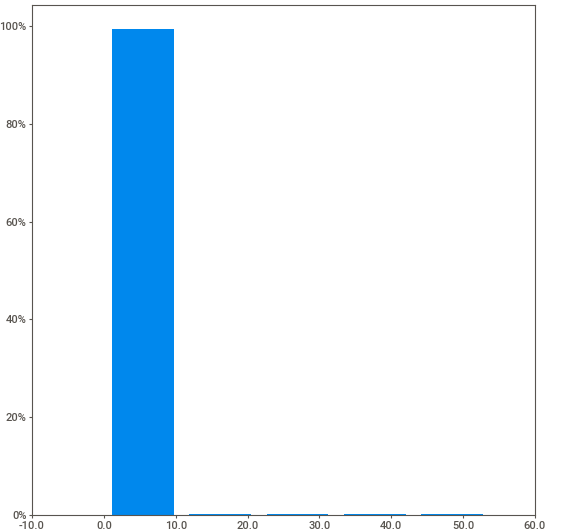
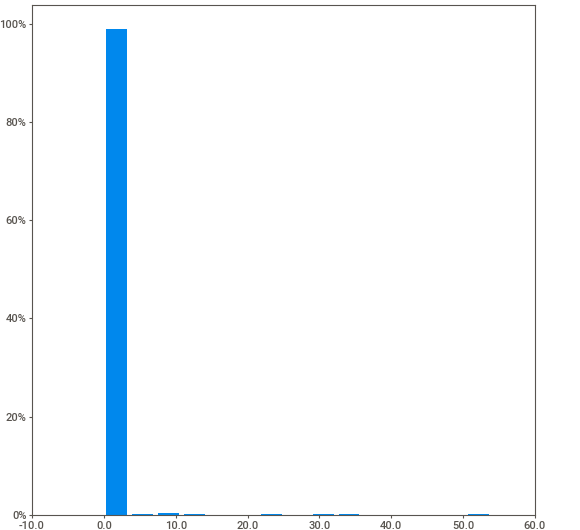
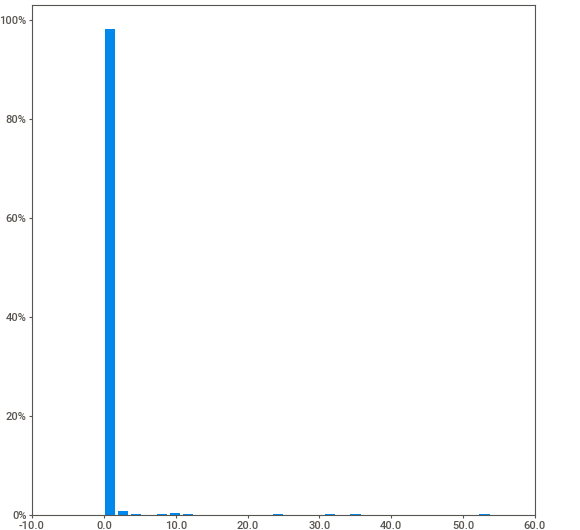
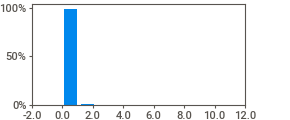
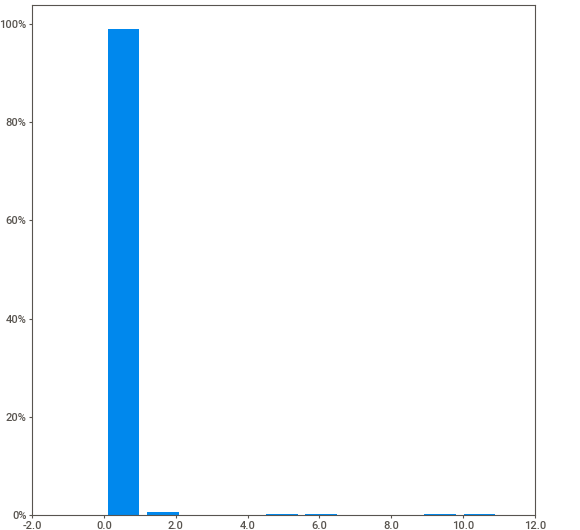
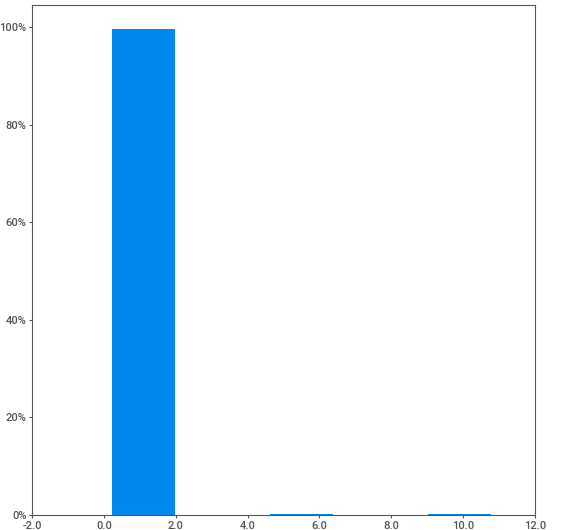
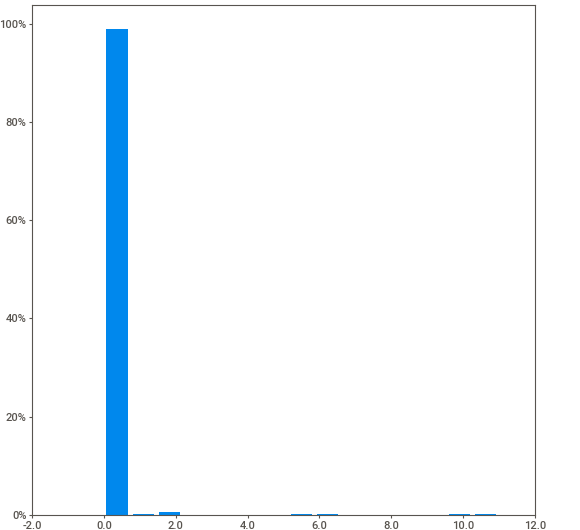
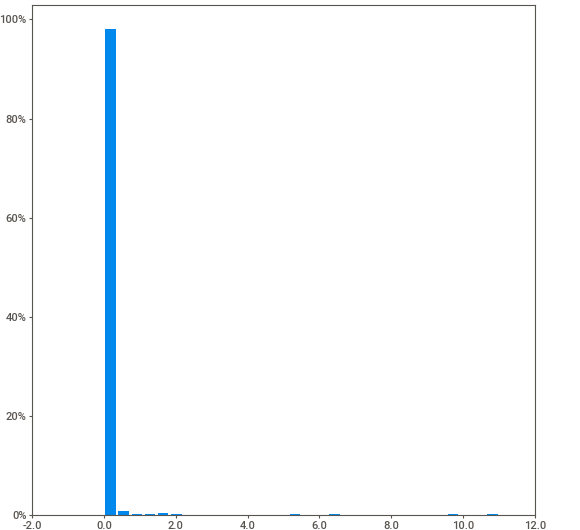
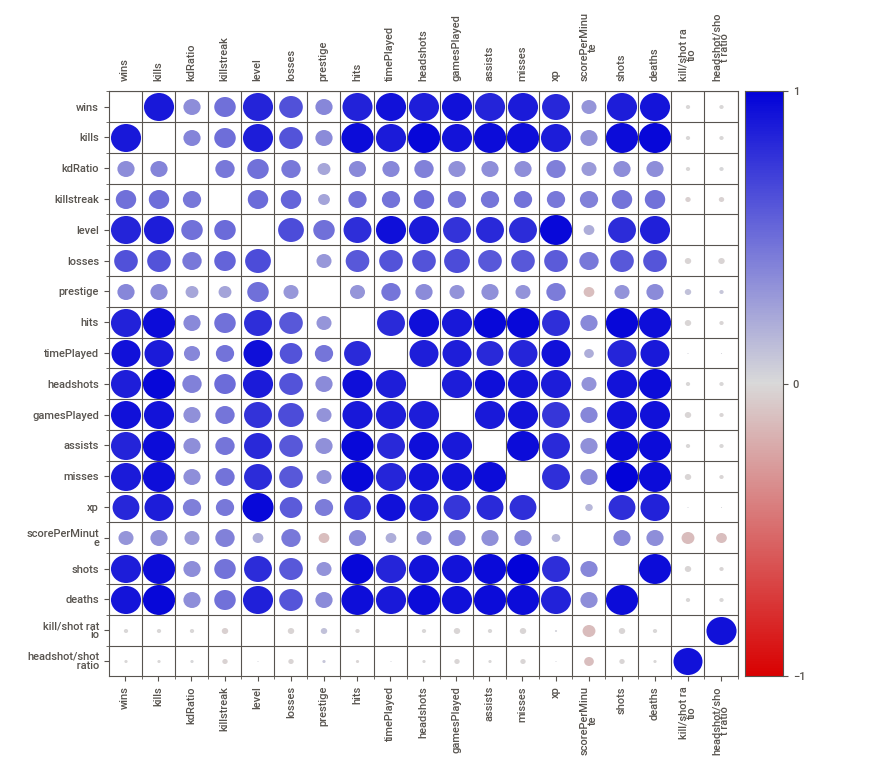
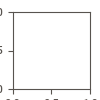

In [8]:
from IPython.display import HTML
report = sv.analyze(base)
report.show_html()
HTML('SWEETVIZ_REPORT.html')

In [18]:
print(base.groupby('kdRatio').size())

kdRatio
0.024390    1
0.031250    1
0.036364    1
0.045455    1
0.047619    1
           ..
2.171183    1
2.280000    1
2.437500    1
2.500000    1
3.000000    1
Length: 1148, dtype: int64


/var/folders/js/5rv9ppjs681003sl1qttpt_w0000gn/T/ipykernel_14991/3385288854.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  base.drop(['kdRatio'],1).hist()


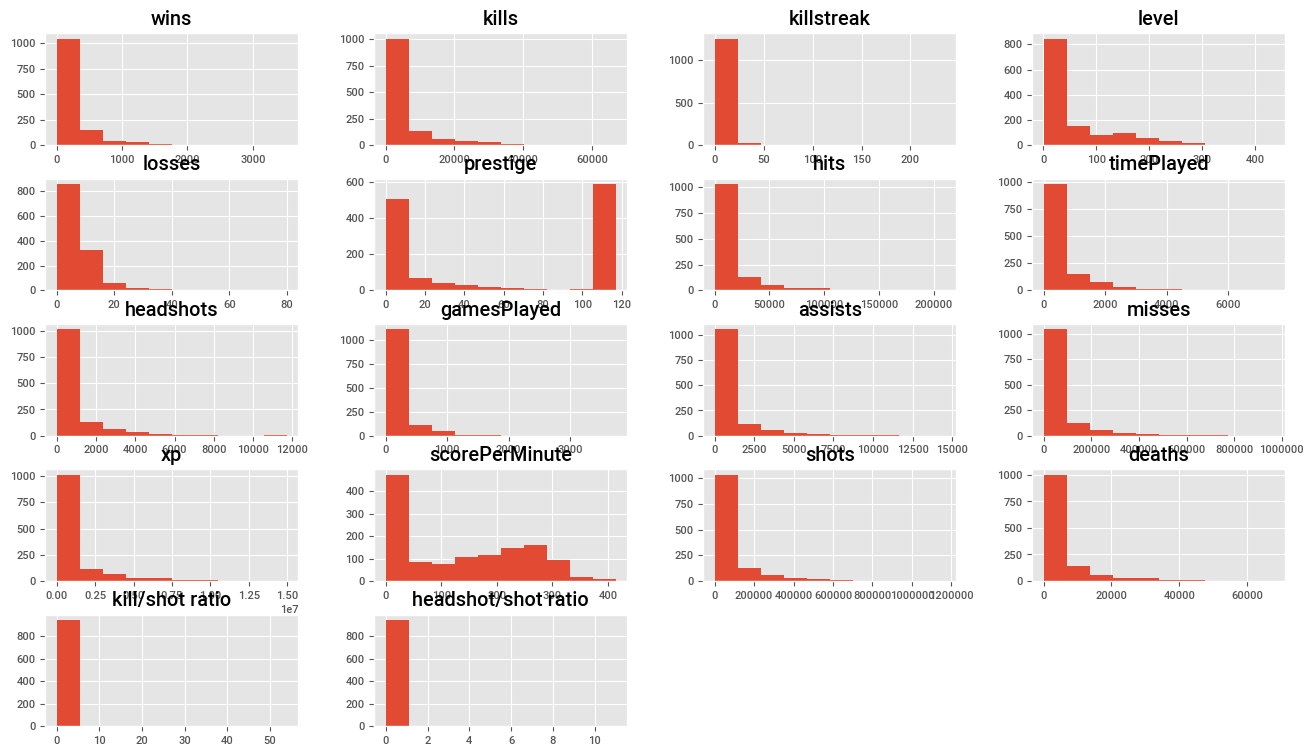

In [22]:
base.drop(['kdRatio'],1).hist()
plt.show()

In [ ]:
Visualización de Datos

/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


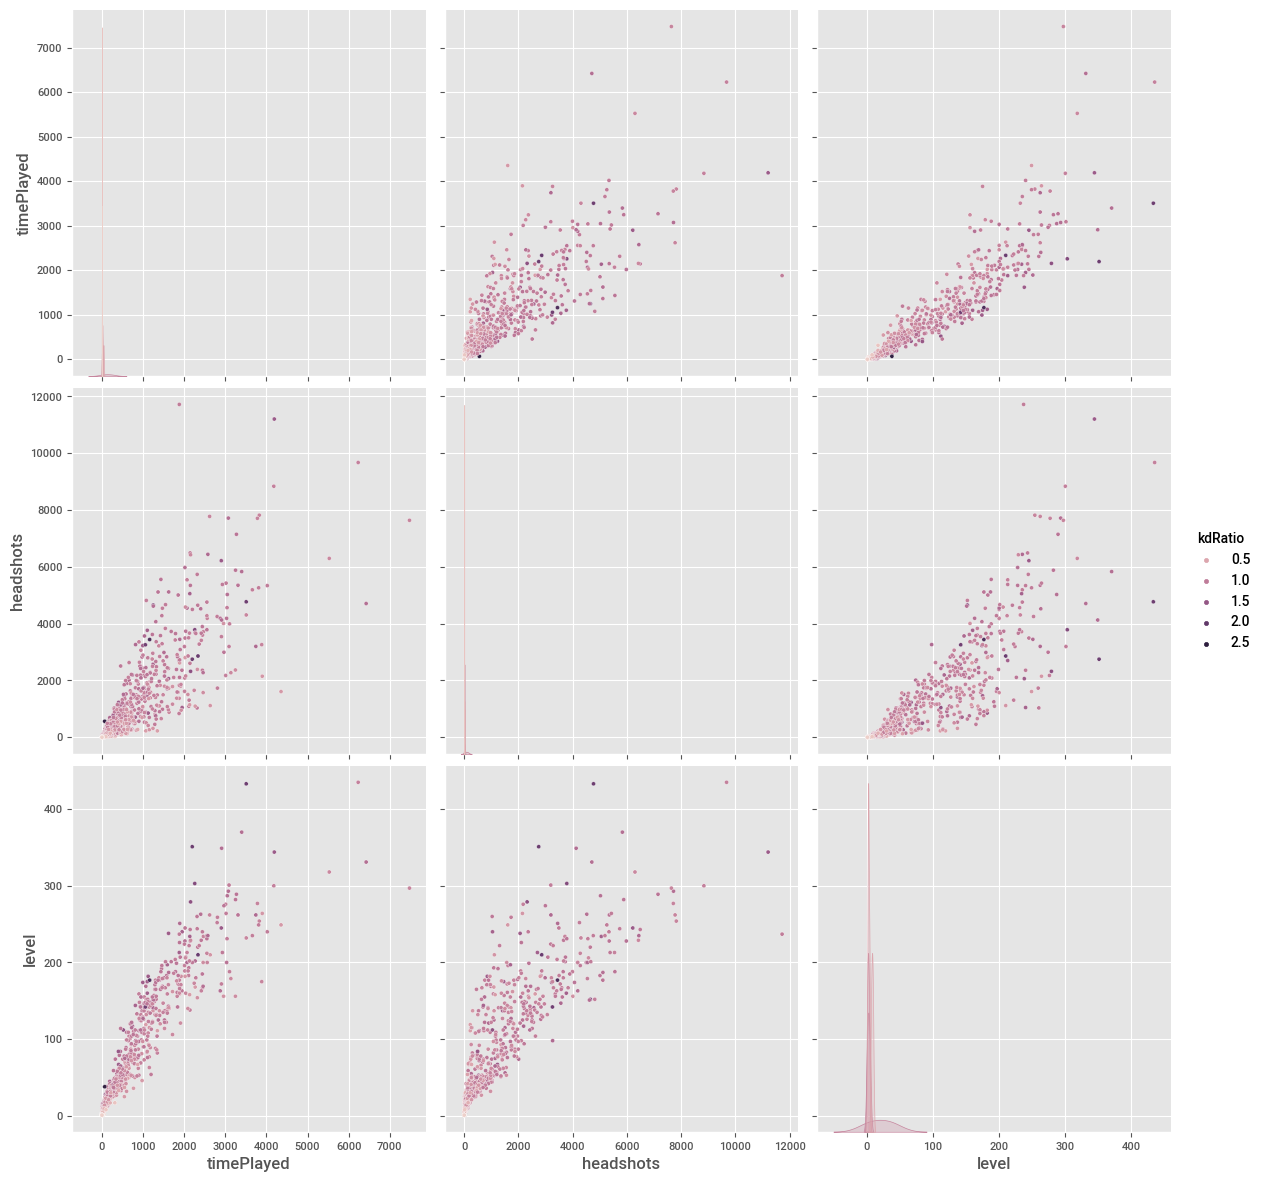

In [23]:
sb.pairplot(base.dropna(), hue='kdRatio',size=4,vars=["timePlayed","headshots","level"],kind='scatter')

In [ ]:
Se define la estructura de datos que utilizaremos para alimentar el algoritmo

In [24]:
X = np.array(base[["timePlayed","headshots","level"]])
y = np.array(base['kdRatio'])
X.shape

(1282, 3)